In [ ]:
# diffusers is a hugging face page for using diffusion models from huggingface hub
# !pip install diffusers transformers gradio accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
# !pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [ ]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch


In [ ]:

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_id1,
    torch_dtype=torch.float16,
    use_safetensors=True
)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions,
dynamic lighting, extreme bokeh, dainty figure, long hair straight down,
torn kawaii shirt and baggy jeans"""

In [ ]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, 
dynamic lighting, extreme bokeh, dainty figure, long hair straight down, 
torn kawaii shirt and baggy jeans


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

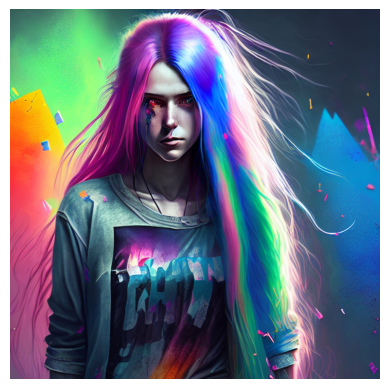

In [ ]:
print("[PROMPT]: ", prompt)
plt.imshow(image)
plt.axis('off')


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A girl is sitting on a chair & she is accompanied by her tiger. 
Make sure to keep it cinematic and color to be golden iris


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

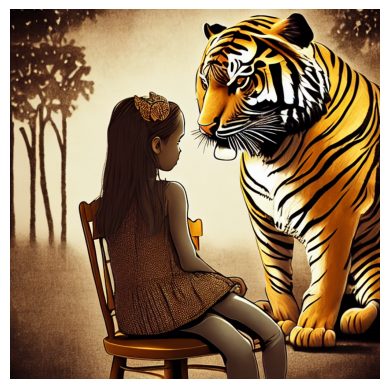

In [ ]:
prompt2 = """A girl is sitting on a chair & she is accompanied by her tiger.
Make sure to keep it cinematic and color to be golden iris"""
image = pipe(prompt2).images[0]
print("[PROMPT]: ", prompt2)
plt.imshow(image)
plt.axis('off')


# 📌 Working with Stable Diffusion Parameters
***Negative prompting ***

### num_inference_steps

### height

### width

### num_images_per_prompt



In [ ]:
def generate_image(pipe, prompt, params):
    img = pipe(prompt, **params).images
    num_images = len(img)

    if num_images > 1:
        fig, ax = plt.subplots(nrows=1, ncols=num_images)
        for i in range(num_images):
            ax[i].imshow(img[i])
            ax[i].axis('off')
    else:
        fig = plt.figure()
        plt.imshow(img[0])
        plt.axis('off')
        plt.tight_layout()


In [ ]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colored powder"


  0%|          | 0/50 [00:00<?, ?it/s]

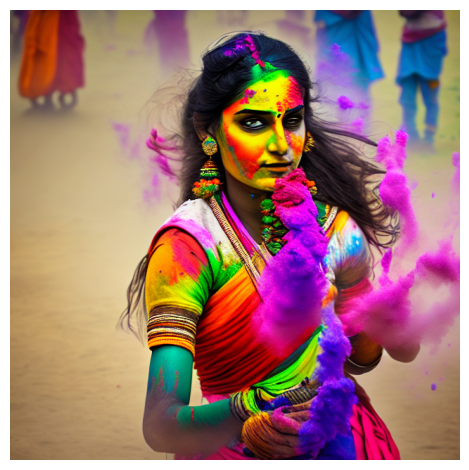

In [ ]:
params = {}
generate_image(pipe, prompt, params)


  0%|          | 0/100 [00:00<?, ?it/s]

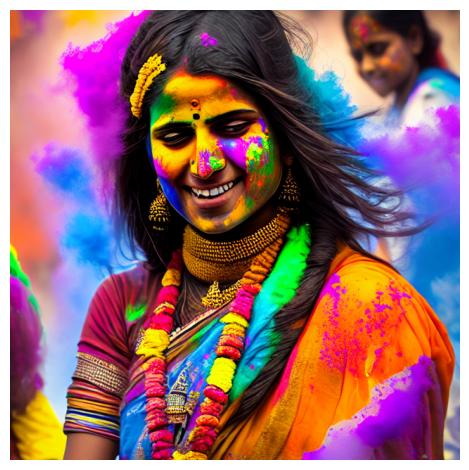

In [ ]:
params = {'num_inference_steps': 100}
generate_image(pipe, prompt, params)


  0%|          | 0/100 [00:00<?, ?it/s]

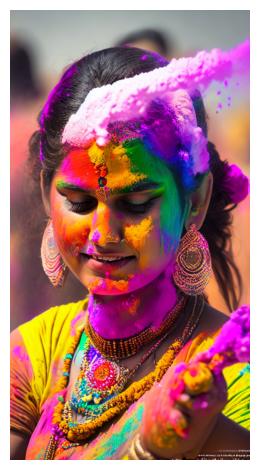

In [ ]:
params = {
    'num_inference_steps': 100,
    'width': 512,
    'height': int(1.5 * 640)
}
generate_image(pipe, prompt, params)


  0%|          | 0/100 [00:00<?, ?it/s]

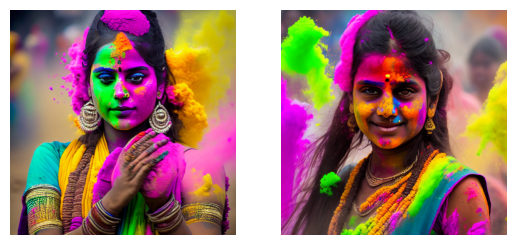

In [ ]:
params = {
    'num_inference_steps': 100,
    'num_images_per_prompt': 2
}

generate_image(pipe, prompt, params)


  0%|          | 0/100 [00:00<?, ?it/s]

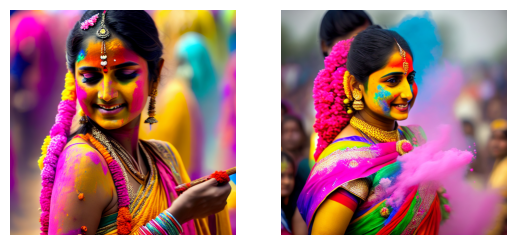

In [ ]:
params = {
    'num_inference_steps': 100,
    'num_images_per_prompt': 2,
    'negative_prompt': 'ugly, distorted, low quality'
}

generate_image(pipe, prompt, params)
